In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# File paths for each dataset
business_file_path = '/content/drive/MyDrive/Colab Notebooks/CIS 509/yelp_dataset/yelp_academic_dataset_business.json'
review_file_path = '/content/drive/MyDrive/Colab Notebooks/CIS 509/yelp_dataset/yelp_academic_dataset_review.json'
user_file_path = '/content/drive/MyDrive/Colab Notebooks/CIS 509/yelp_dataset/yelp_academic_dataset_user.json'
checkin_file_path = '/content/drive/MyDrive/Colab Notebooks/CIS 509/yelp_dataset/yelp_academic_dataset_checkin.json'
tip_file_path = '/content/drive/MyDrive/Colab Notebooks/CIS 509/yelp_dataset/yelp_academic_dataset_tip.json'

In [ ]:
# Reading data
business_df = pd.read_json(business_file_path, lines=True)
review_df = pd.read_json(review_file_path, lines=True, nrows=1000)
user_df = pd.read_json(user_file_path, lines=True, nrows=1000)
checkin_df = pd.read_json(checkin_file_path, lines=True, nrows=1000)
tip_df = pd.read_json(tip_file_path, lines=True, nrows=1000)

In [ ]:
# Writing data
business_df.to_csv('business_output.csv', index=False)
review_df.to_csv('review_output.csv', index=False)
user_df.to_csv('user_output.csv', index=False)
checkin_df.to_csv('checkin_output.csv', index=False)
tip_df.to_csv('tip_output.csv', index=False)

In [ ]:
# Read the business data
business_df = pd.read_json(business_file_path, lines=True, nrows=1000)

# Print the columns of business_df
print(business_df.columns)

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')


In [ ]:
# Read the business data
business_df = pd.read_json(business_file_path, lines=True)

# Filter business_df for businesses in Arizona with a review_count greater than 100
business_df = business_df[(business_df['state'] == 'AZ') & (business_df['review_count'] > 100)]

# Select the first 1000 rows after filtering
business_df = business_df.head(1000)

# Resetting index after filtering
business_df.reset_index(drop=True, inplace=True)

In [ ]:
  # Explore dataframes
print(business_df.info())
print(review_df.info())
print(user_df.info())
print(checkin_df.info())
print(tip_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   928 non-null    object 
 1   name          928 non-null    object 
 2   address       928 non-null    object 
 3   city          928 non-null    object 
 4   state         928 non-null    object 
 5   postal_code   928 non-null    object 
 6   latitude      928 non-null    float64
 7   longitude     928 non-null    float64
 8   stars         928 non-null    float64
 9   review_count  928 non-null    int64  
 10  is_open       928 non-null    int64  
 11  attributes    925 non-null    object 
 12  categories    928 non-null    object 
 13  hours         916 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 101.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count 

In [ ]:
# Display summary statistics for numerical columns
print(business_df.describe())

         latitude   longitude       stars  review_count     is_open
count  928.000000  928.000000  928.000000    928.000000  928.000000
mean    32.253147 -110.934057    3.754310    238.266164    0.843750
std      0.069721    0.068792    0.607826    181.865478    0.363288
min     31.902711 -111.166815    1.500000    101.000000    0.000000
25%     32.221521 -110.973798    3.500000    129.000000    1.000000
50%     32.236471 -110.944384    4.000000    178.500000    1.000000
75%     32.287061 -110.889663    4.000000    270.000000    1.000000
max     32.507650 -110.633574    5.000000   2126.000000    1.000000


In [ ]:
# Display unique values for categorical columns
print("Unique Cities:", business_df['city'].unique())
print("Unique States:", business_df['state'].unique())
# ... and so on for other categorical columns

Unique Cities: ['Tucson' 'Marana' 'Oro Valley' 'Vail' 'Mount Lemmon' 'Catalina'
 'Green Valley' 'tucson' 'Sahuarita' 'Corona De Tucson' 'Tuscon']
Unique States: ['AZ']


In [ ]:
# Check for missing values
print("Missing Values:\n", business_df.isnull().sum())

# Handle missing values if needed, for example, you might choose to drop rows with missing 'attributes' or 'hours'
# business_df.dropna(subset=['attributes', 'hours'], inplace=True)

Missing Values:
 business_id      0
name             0
address          0
city             0
state            0
postal_code      0
latitude         0
longitude        0
stars            0
review_count     0
is_open          0
attributes       3
categories       0
hours           12
dtype: int64


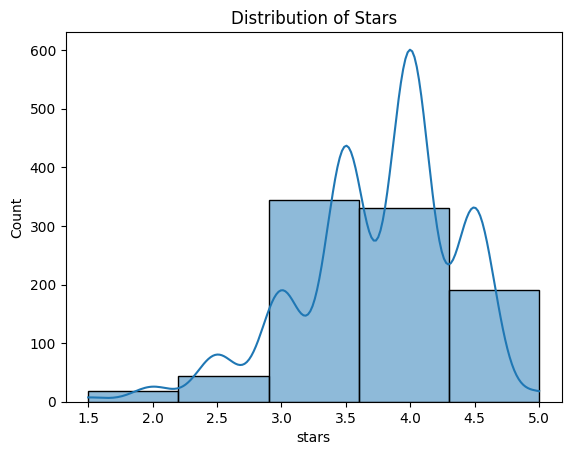

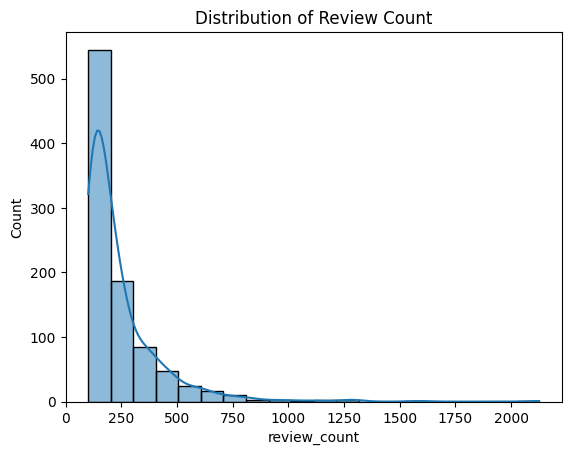

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Stars
sns.histplot(business_df['stars'], bins=5, kde=True)
plt.title('Distribution of Stars')
plt.show()

# Distribution of Review Count
sns.histplot(business_df['review_count'], bins=20, kde=True)
plt.title('Distribution of Review Count')
plt.show()

<ipython-input-12-6b0ab217002f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = business_df.corr()


Correlation Matrix:
               latitude  longitude     stars  review_count   is_open
latitude      1.000000  -0.333518 -0.011818      0.005877  0.001424
longitude    -0.333518   1.000000 -0.027927     -0.028118 -0.005683
stars        -0.011818  -0.027927  1.000000      0.173974  0.082439
review_count  0.005877  -0.028118  0.173974      1.000000  0.099166
is_open       0.001424  -0.005683  0.082439      0.099166  1.000000


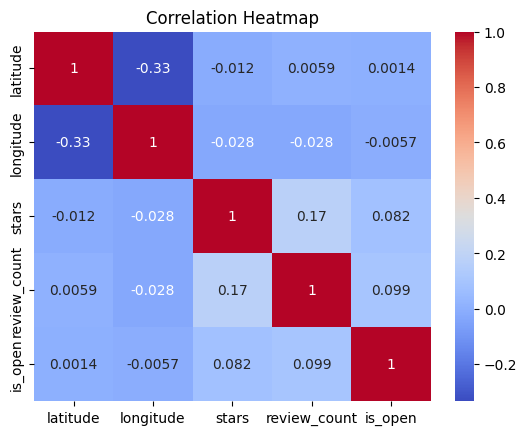

In [ ]:
# Correlation matrix
correlation_matrix = business_df.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Heatmap for better visualization
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Count of businesses in each category
category_counts = business_df['categories'].value_counts()
print("Category Counts:\n", category_counts)

Category Counts:
 Restaurants, Mexican                                                                                                                                    22
Mexican, Restaurants                                                                                                                                    17
Chinese, Restaurants                                                                                                                                     8
Beauty & Spas, Nail Salons                                                                                                                               5
Restaurants, Chinese                                                                                                                                     5
                                                                                                                                                        ..
Burgers, Restaurants, American (New)                

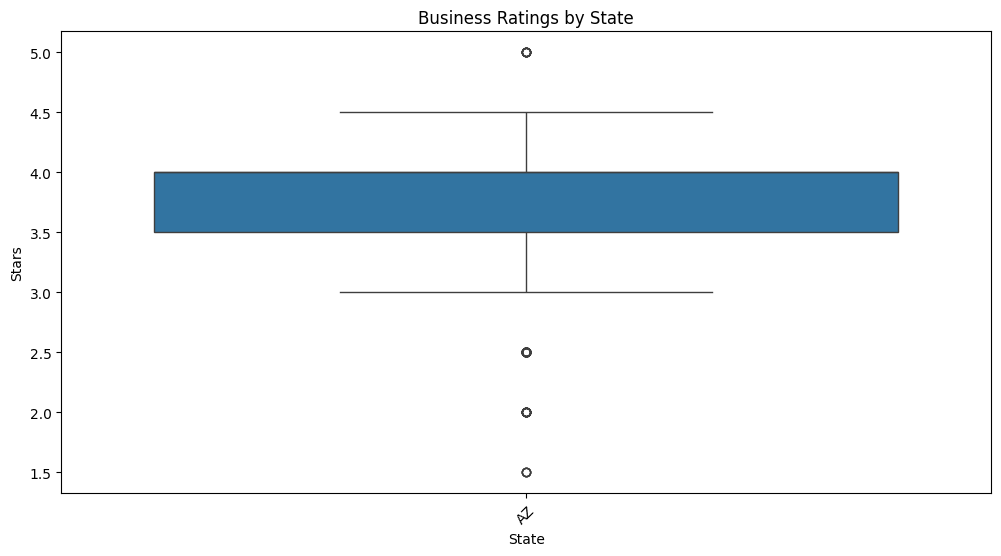

In [ ]:
# Plot a box plot of business ratings by state
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='stars', data=business_df)
plt.xlabel('State')
plt.ylabel('Stars')
plt.title('Business Ratings by State')
plt.xticks(rotation=45)
plt.show()

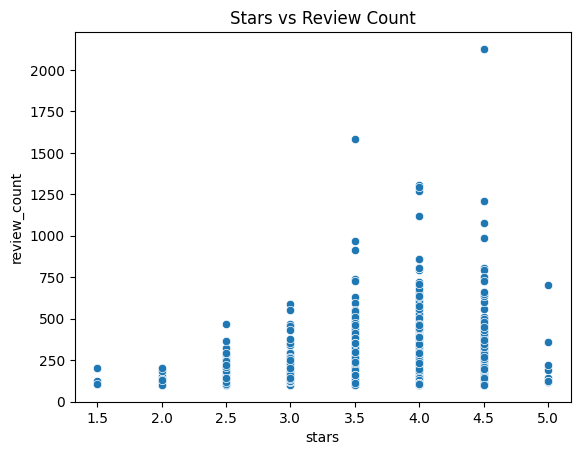

In [ ]:
# Relationship between stars and review count
sns.scatterplot(x='stars', y='review_count', data=business_df)
plt.title('Stars vs Review Count')
plt.show()

# # Boxplot of stars for each city
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='city', y='stars', data=business_df)
# plt.title('Stars Distribution in Each City')
# plt.xticks(rotation=45)
# # plt.show()

In [ ]:
# Impute missing values in 'attributes' and 'hours' columns
business_df['attributes'].fillna('No Information', inplace=True)
business_df['hours'].fillna('No Information', inplace=True)

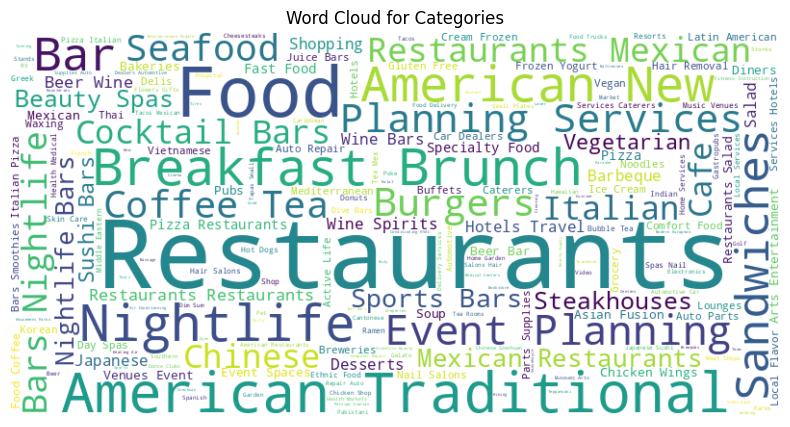

In [ ]:
from wordcloud import WordCloud

# Word cloud for 'categories'
categories_text = ' '.join(business_df['categories'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(categories_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Categories')
plt.show()

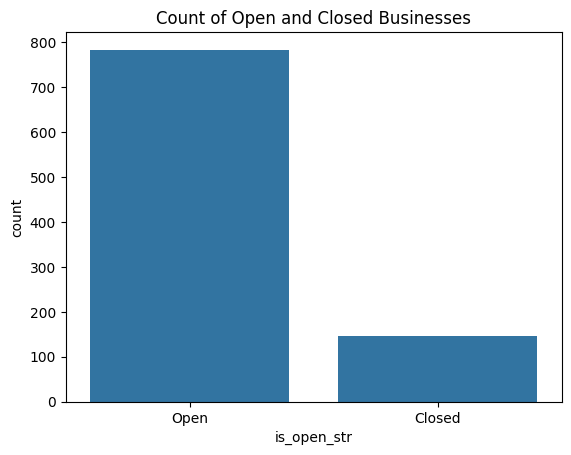

In [ ]:
# Convert 'is_open' to a more readable format
business_df['is_open_str'] = business_df['is_open'].map({0: 'Closed', 1: 'Open'})

# Bar plot for 'is_open'
sns.countplot(x='is_open_str', data=business_df)
plt.title('Count of Open and Closed Businesses')
plt.show()

In [ ]:
# use  this for overall dataset (If from the begining we are using AZ data please use the next code block to this)
import pandas as pd
import folium
from folium.plugins import HeatMap

def create_arizona_heatmap(business_df):
    # Filter business_df for businesses in Arizona and without NaN values in latitude or longitude
    arizona_df = business_df[(business_df['state'] == 'AZ') & ~business_df[['latitude', 'longitude']].isnull().any(axis=1)]

    # Print the filtered DataFrame
    print(arizona_df)

    # Check if there are any businesses left after filtering
    if arizona_df.empty:
        print("No valid data for the heatmap.")
        return None

    # Create an interactive map using folium with HeatMap
    average_latitude = arizona_df['latitude'].mean()
    average_longitude = arizona_df['longitude'].mean()
    my_map = folium.Map(location=[average_latitude, average_longitude], zoom_start=7)

    # Add a HeatMap layer based on business density
    heat_data = [[row['latitude'], row['longitude']] for _, row in arizona_df.iterrows()]
    HeatMap(heat_data).add_to(my_map)

    return my_map

# Assuming 'business_df' is your DataFrame
arizona_heatmap = create_arizona_heatmap(business_df)

# Display the interactive map
if arizona_heatmap:
    arizona_heatmap

# Display the interactive map
if arizona_heatmap:
    display(arizona_heatmap)

                business_id                          name  \
0    f82dhKNiUXsDVPMLqKYiIQ                 Sher-e-Punjab   
1    KDcHC6Es_jv4tloj0NP6gA                    Family Air   
2    bCIZeggW02uPdz2lobSjUA                  Good Oak Bar   
3    Y3ZCO17N1_T_Ms1JmswwzA        Taqueria Pico De Gallo   
4    lhsQkb5nhf-Kd5OvgB9MNg                 Sachiko Sushi   
..                      ...                           ...   
923  Vk4AsKa0Eg0QIO5cL0GFkg                 Chapman Honda   
924  sOjbtBWo-m6rpjHv4tA_oQ           Brewd Coffee & Food   
925  TIuiTV363NW-OZ1REJRikw           European Wax Center   
926  IeSD0nMKRFYUTnR5nZH1CQ               HighWire Lounge   
927  fWeWzB9STxcX40AgSEQVcw  Arizona-Sonora Desert Museum   

                     address        city state postal_code   latitude  \
0          853 East Grant Rd      Tucson    AZ       85719  32.250960   
1             2021 E 12th St      Tucson    AZ       85719  32.220199   
2          316 E Congress St      Tucson    AZ  

In [ ]:
# It's little better then the above one it is just like it is automatically zoomed to AZ so it visually better then above please use this one
import pandas as pd
import folium
from folium.plugins import HeatMap

def create_business_heatmap(business_df):
    # Create an interactive map using folium with HeatMap
    average_latitude = business_df['latitude'].mean()
    average_longitude = business_df['longitude'].mean()
    my_map = folium.Map(location=[average_latitude, average_longitude], zoom_start=12)

    # Add a HeatMap layer based on business density
    heat_data = [[row['latitude'], row['longitude']] for index, row in business_df.iterrows()]
    HeatMap(heat_data).add_to(my_map)

    return my_map

# Assuming 'business_df' is your DataFrame
business_heatmap = create_business_heatmap(business_df)

# Display the interactive map
business_heatmap

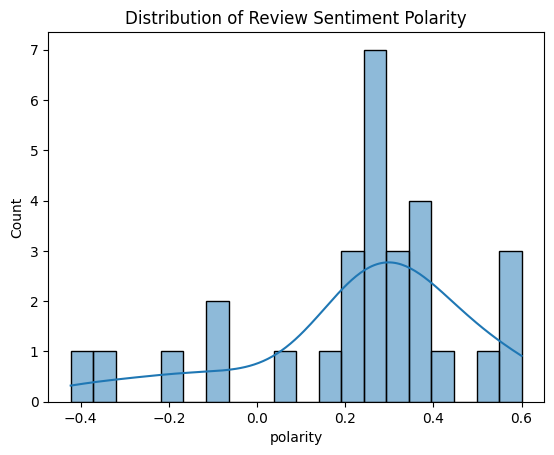

In [ ]:
# Assuming 'review_df' has columns 'business_id' and 'text'
merged_df = pd.merge(business_df, review_df, on='business_id')

# Example: Sentiment Analysis using TextBlob
from textblob import TextBlob

merged_df['polarity'] = merged_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
sns.histplot(merged_df['polarity'], bins=20, kde=True)
plt.title('Distribution of Review Sentiment Polarity')
plt.show()

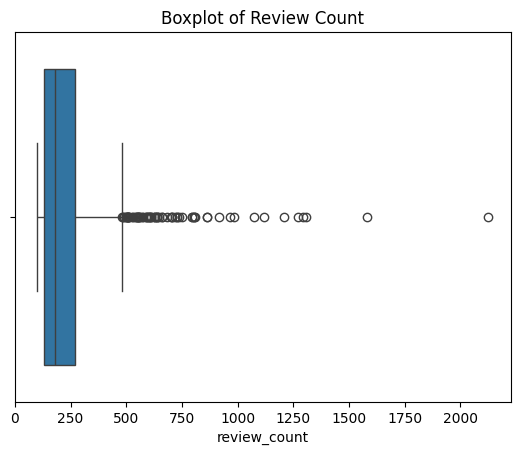

Outliers with High Review Counts:
                business_id  \
9    UCMSWPqzXjd7QHq7v8PJjQ   
12   8QJTzIaR5FceGds8HBSIig   
33   CA5BOxKRDPGJgdUQ8OUOpw   
36   jmwasbZfgj3honf79qKsnA   
62   3StNEgKAwpCFR1q0urmJrw   
72   U3aNQ5DsABPYyJQolsCbJg   
84   WSx9-iYYyST_umny9sJBFg   
85   DVBJRvnCpkqaYl6nHroaMg   
128  LmZWlvPJBwj5WG2KHV-v1Q   
184  UjQnH-pElJZ9jD51vOt5Rw   
193  tV46IhCfHbsx_af-pMupiw   
214  j8feOxyJqlIJWOi8su2qzw   
233  9zlIJ7Q5W4AENjpGgaNSsQ   
295  wj8XtPyuREj8_0GQz3LZ6w   
303  LZzDvgfpkd4nI3E4L9wF1w   
315  hyeo7JQr5uLp-St1MibYAA   
359  U782dba0FoFLi3cmXbo88Q   
361  OMT709IPPEwN91CAXpe9dw   
368  IKMAgK2m6WRIViVFB2vAFQ   
369  iOFbMitGdfU6i5xm4nZ8Ww   
384  43MDfrU28FYjfpamNfL9GA   
387  zwrgCMuZyFX46mL3piDyjg   
423  uSIGgRScZmpWlEcHtoaWlA   
426  4r6N_Fhiwoqo_FqQ7Mm6mQ   
448  5P4w4WfPbXzUi6YALfwx2g   
449  5s7I0Khg7ReVzfO7niJtKg   
501  muxda1cSVtplETqTfYVgZA   
503  Rv8bW3pkzpi5dZu5ckbgtA   
507  14QP5lOdrTAVVCDDuHIAUg   
580  OuaqRGlscxMIqUoN4Vw41A   
589  

In [ ]:
# Boxplot for review count to identify outliers
sns.boxplot(x=business_df['review_count'])
plt.title('Boxplot of Review Count')
plt.show()

# Identify and display businesses with unusually high review counts
outliers = business_df[business_df['review_count'] > business_df['review_count'].quantile(0.95)]
print('Outliers with High Review Counts:')
print(outliers[['business_id', 'name', 'review_count']])

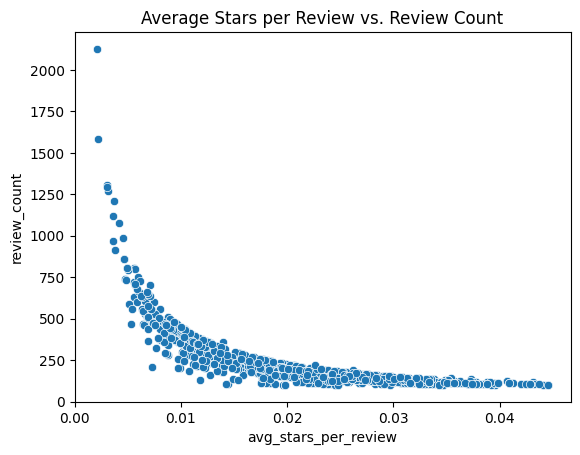

In [ ]:
# Creating a new feature: Average stars per review
business_df['avg_stars_per_review'] = business_df['stars'] / business_df['review_count']

# Scatterplot of average stars per review vs. review count
sns.scatterplot(x='avg_stars_per_review', y='review_count', data=business_df)
plt.title('Average Stars per Review vs. Review Count')
plt.show()

In [ ]:
# # Analyzing distribution of businesses in different postal codes
# plt.figure(figsize=(12, 6))
# sns.countplot(x='postal_code', data=business_df)
# plt.title('Distribution of Businesses in Different Postal Codes')
# plt.xticks(rotation=45)
# plt.show()

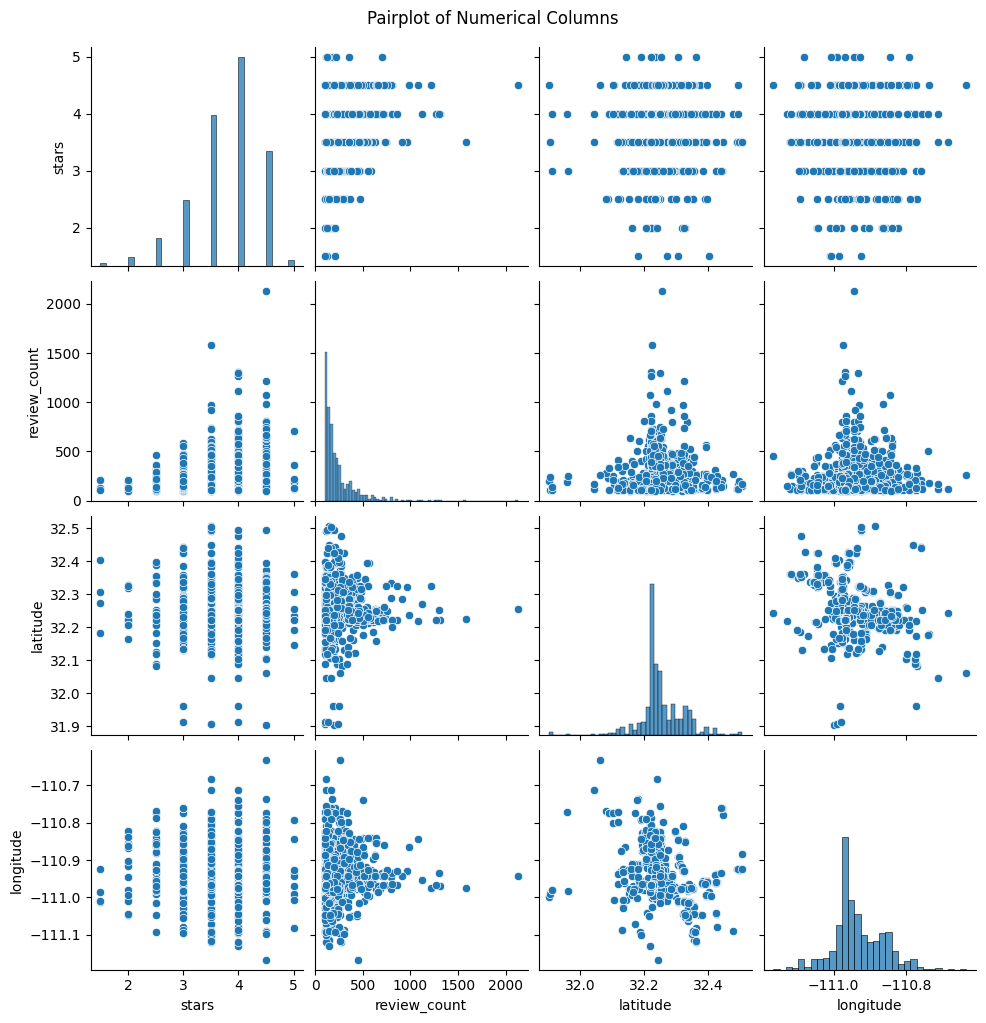

In [ ]:
# Pairplot for numerical columns
sns.pairplot(business_df[['stars', 'review_count', 'latitude', 'longitude']])
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from folium import Marker, Popup
from IPython.display import display, HTML

# Replace these values with the actual latitude and longitude of the user's location
user_latitude = 40.7128  # Example latitude (New York City)
user_longitude = -74.0060  # Example longitude (New York City)

# Get user's location
user_location = [user_latitude, user_longitude]


def create_business_heatmap(business_df):
    # Create an interactive map using folium with HeatMap
    average_latitude = business_df['latitude'].mean()
    average_longitude = business_df['longitude'].mean()

    my_map = folium.Map(location=[average_latitude, average_longitude], zoom_start=12, control_scale=True)

    # Add a HeatMap layer based on business density
    heat_data = [[row['latitude'], row['longitude']] for index, row in business_df.iterrows()]
    HeatMap(heat_data).add_to(my_map)

    return my_map

def add_button(map_object, button_text, button_function):
    button_html = f"""
        <button onclick="{button_function}('{map_object.get_name()}')">{button_text}</button>
    """
    button = folium.Html(button_html)
    button.add_to(map_object)

# Function to switch to the default map view
def switch_to_default_view(map_name):
    map_object = folium.Map.get_map(map_name)
    map_object.set_options('tiles', 'OpenStreetMap')

# Function to switch to the satellite view
def switch_to_satellite_view(map_name):
    map_object = folium.Map.get_map(map_name)
    map_object.set_options('tiles', 'Stamen Terrain')

# Function to estimate distance from user location to average business location
def estimate_distance(user_location, business_location):
    return folium.map.distance(user_location, business_location).meters

# Assuming 'business_df' is your DataFrame
business_heatmap_default = create_business_heatmap(business_df)

# Add buttons to switch between map and satellite view
add_button(business_heatmap_default, 'Map', switch_to_default_view)
add_button(business_heatmap_default, 'Satellite', switch_to_satellite_view)

# Get user's location (you can customize this)
user_location = [your_latitude, your_longitude]

# Add marker for user's location
user_marker = Marker(location=user_location, popup='Your Location', icon=folium.Icon(color='blue'))
user_marker.add_to(business_heatmap_default)

# Calculate and display distance to average business location
average_business_location = [business_heatmap_default.get_center()[0], business_heatmap_default.get_center()[1]]
distance = estimate_distance(user_location, average_business_location)

distance_popup_text = f"Distance to Average Business Location: {distance:.2f} meters"
distance_popup = Popup(distance_popup_text, max_width=300)
distance_popup.add_to(user_marker)

# Display the interactive map
display(business_heatmap_default)

NameError: name 'your_latitude' is not defined

In [ ]:
pip install geopandas folium

Checkin Data

In [ ]:
print(checkin_df.head())

              business_id                                               date
0  ---kPU91CF4Lq2-WlRu9Lw  2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...
1  --0iUa4sNDFiZFrAdIWhZQ  2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011...
2  --30_8IhuyMHbSOcNWd6DQ           2013-06-14 23:29:17, 2014-08-13 23:20:22
3  --7PUidqRWpRSpXebiyxTg  2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012...
4  --7jw19RH9JKXgFohspgQw  2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014...


In [ ]:
print(checkin_df.describe())

                   business_id  \
count                     1000   
unique                    1000   
top     ---kPU91CF4Lq2-WlRu9Lw   
freq                         1   

                                                     date  
count                                                1000  
unique                                               1000  
top     2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...  
freq                                                    1  


In [ ]:
print(checkin_df.isnull().sum())

business_id    0
date           0
dtype: int64


In [ ]:
print(checkin_df.dtypes)

business_id    object
date           object
dtype: object


In [ ]:
for column in checkin_df.columns:
    print(f"Unique values in {column}: {checkin_df[column].nunique()}")


Unique values in business_id: 1000
Unique values in date: 1000


In [ ]:
print(checkin_df['business_id'].value_counts())
print(checkin_df['date'].value_counts())

---kPU91CF4Lq2-WlRu9Lw    1
-JQ6tBgz-YUD5HjJXIRKYg    1
-J0tPzkwPnyulSBE_s863Q    1
-J2jdESTpkDW183YbKOPig    1
-J3JwamIZpS1giOMQENTPQ    1
                         ..
-8xqG21DUzav7yIp5lS6jw    1
-8z1z-kYVvFFT4HUVSV-lA    1
-97632CUoOkJ8x4AlkPJxQ    1
-981bIUN3Qt27CVwN46h1Q    1
-Ti5pwj6mA99khsxxur8aQ    1
Name: business_id, Length: 1000, dtype: int64
2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020-07-24 22:42:27, 2020-10-24 21:36:13, 2020-12-09 21:23:33, 2021-01-20 17:34:57, 2021-04-30 21:02:03, 2021-05-25 21:16:54, 2021-08-06 21:08:08, 2021-10-02 15:15:42, 2021-11-11 16:23:50                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [ ]:
import pandas as pd

# Assuming 'checkin_df' is your DataFrame
checkin_df['date'] = checkin_df['date'].apply(lambda x: [pd.to_datetime(date_str.strip()) for date_str in x.split(',')])

# If you want to keep only the first date in the list, you can modify the code like this:
# checkin_df['date'] = checkin_df['date'].apply(lambda x: pd.to_datetime(x.split(',')[0].strip()))

# If you want to create a new column with the first date, you can do this:
# checkin_df['first_date'] = checkin_df['date'].apply(lambda x: pd.to_datetime(x.split(',')[0].strip()))


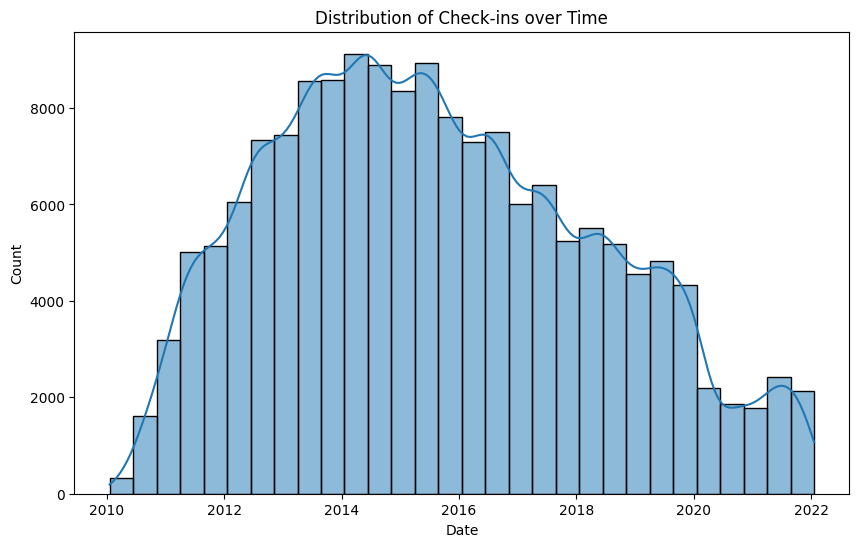

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'checkin_df' is your DataFrame
checkin_df['date'] = checkin_df['date'].apply(lambda x: [pd.to_datetime(date) for date in x])

# Flatten the list of datetime values
flat_dates = [date for sublist in checkin_df['date'] for date in sublist]

# Example: Histogram of check-ins over time
plt.figure(figsize=(10, 6))
sns.histplot(flat_dates, bins=30, kde=True)
plt.title('Distribution of Check-ins over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()